In [130]:
import pandas as pd
import re
import pymorphy2
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,auc, fbeta_score

In [3]:
df = pd.read_csv('titanicdf.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df = df.dropna(subset = ['Age','Cabin','Embarked'])

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [16]:
titanic_df = df[['Survived','Pclass','Age','Fare']]

In [17]:
titanic_df

,Survived,Pclass,Age,Fare
1,1,1,38.0,71.2833
3,1,1,35.0,53.1000
6,0,1,54.0,51.8625
10,1,3,4.0,16.7000
11,1,1,58.0,26.5500
...,...,...,...,...
871,1,1,47.0,52.5542
872,0,1,33.0,5.0000
879,1,1,56.0,83.1583
887,1,1,19.0,30.0000


In [23]:
x_train, x_test, y_train, y_test = train_test_split(titanic_df.drop('Survived',axis=1), df['Survived'], test_size=0.2, random_state=200)

In [24]:
df['Survived']

1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    1
Name: Survived, Length: 183, dtype: int64

In [25]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [27]:
x_train.shape

(146, 3)

In [28]:
x_test.shape

(37, 3)

In [29]:
pred = rfc.predict(x_test)

In [100]:
print('Accuracy:',accuracy_score(y_test,pred))
print('Precision:',precision_score(y_test,pred))
print('Recall:',recall_score(y_test,pred))
print('F1:',f1_score(y_test,pred))

Accuracy: 0.4594594594594595
Precision: 0.6111111111111112
Recall: 0.4583333333333333
F1: 0.5238095238095238


In [121]:
# подбор гиперпараметров
params = {'criterion':['gini','entropy'],
          'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
          'n_estimators':[1,2,3,4,5,6,7,8,9,10]}

In [132]:
clf_gs = GridSearchCV(RandomForestClassifier(), params)
clf_gs.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [133]:
clf_gs.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'n_estimators': 8}

In [134]:
new_rfc = RandomForestClassifier(**clf_gs.best_params_)
new_rfc.fit(x_train, y_train) 

RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=8)

In [135]:
new_pred = new_rfc.predict(x_test)

In [136]:
print('Accuracy:',accuracy_score(y_test,new_pred))
print('Precision:',precision_score(y_test,new_pred))
print('Recall:',recall_score(y_test,new_pred))
print('F1:',f1_score(y_test,new_pred))

Accuracy: 0.6756756756756757
Precision: 0.7142857142857143
Recall: 0.8333333333333334
F1: 0.7692307692307692


In [118]:
# Кросс-валидация
cv = ShuffleSplit(n_splits=10, test_size=0.33, random_state=0)
scores = cross_val_score(new_rfc, x_train, y_train, cv=cv, scoring='recall')

In [119]:
scores.mean()

0.895842239143947

In [120]:
scores

array([0.85714286, 0.80645161, 0.88235294, 0.81818182, 0.93939394,
       0.88571429, 0.88888889, 0.94285714, 0.96969697, 0.96774194])

In [123]:
# Построим ROC-кривую
rfc.predict(x_test)

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [124]:
rfc.predict_proba(x_test)[:,1]

array([0.5, 1. , 1. , 0.5, 0.5, 1. , 1. , 0.5, 0.5, 1. , 0.5, 1. , 1. ,
       1. , 1. , 0. , 0. , 0.5, 0.5, 0.5, 1. , 0. , 0.5, 1. , 1. , 1. ,
       1. , 1. , 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 1. , 1. , 0.5])

In [125]:
pred_proba = rfc.predict_proba(x_test)[:,1]

In [128]:
fpr, tpr, treshold = roc_curve(y_test, pred_proba)
forest_auc = roc_auc_score(y_test, pred_proba)
print('RandomForestClassifier: ROC AUC=%.3f' % (forest_auc))

RandomForestClassifier: ROC AUC=0.492


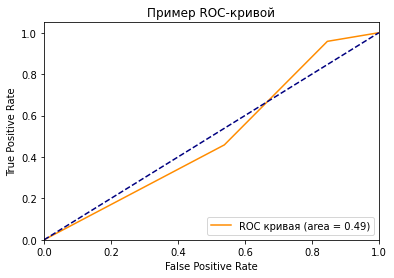

In [131]:
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr,  color='darkorange',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Пример ROC-кривой')
plt.legend(loc="lower right")
plt.show()